# Predict Diabetes using Perceptron

## Loading the Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dat_know = pd.read_csv('diabetes.csv')

In [3]:
dat_know.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dat_know.shape

(768, 9)

In [5]:
dat_know.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Exploratory Data Analysis

In [6]:
dat_know.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: xlabel='Outcome', ylabel='count'>

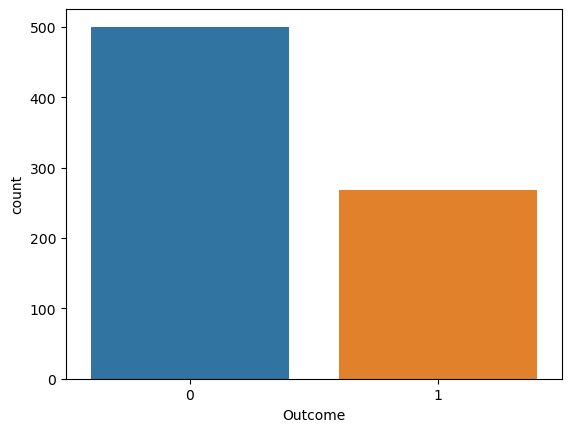

In [7]:
sns.countplot(x = 'Outcome',data = dat_know)

C:\Users\Vineeth M R\AppData\Local\Temp\ipykernel_15728\957727032.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(num_rows, 3, j + 1)


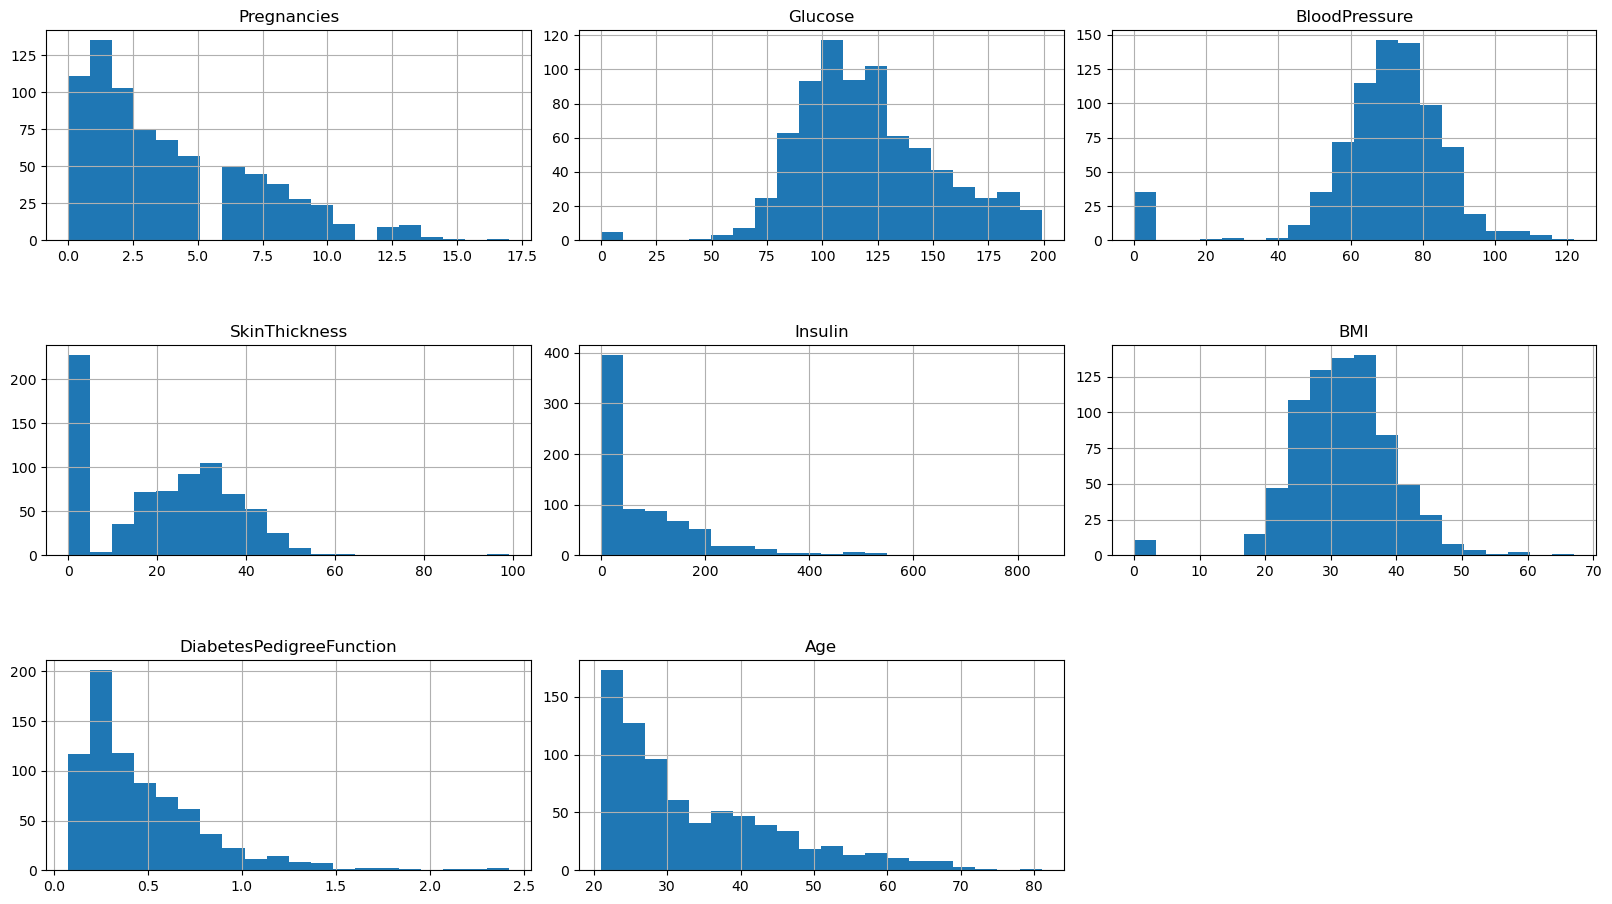

In [8]:
import itertools
import math

col = dat_know.columns[:8]
plt.subplots(figsize = (20, 15))
length = len(col)
num_rows = math.ceil(length/2)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot(num_rows, 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    dat_know[i].hist(bins = 20)
    plt.title(i)
plt.show()

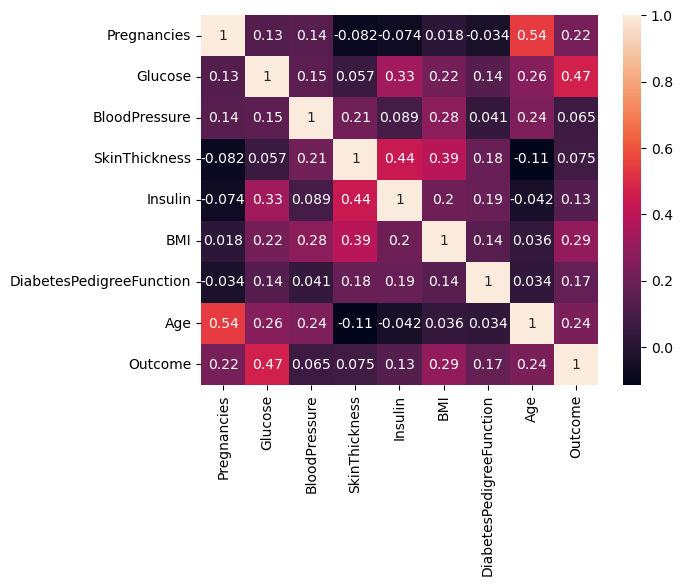

In [9]:
sns.heatmap(dat_know.corr(), annot = True)
plt.show()

In [10]:
dat_new_1 = dat_know

In [11]:
dat_new_1[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = dat_new_1[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN)

In [12]:
dat_new_1.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [13]:
dat_new_1["Glucose"].fillna(dat_new_1["Glucose"].mean(), inplace = True)
dat_new_1["BloodPressure"].fillna(dat_new_1["BloodPressure"].mean(), inplace = True)
dat_new_1["SkinThickness"].fillna(dat_new_1["SkinThickness"].mean(), inplace = True)
dat_new_1["Insulin"].fillna(dat_new_1["Insulin"].mean(), inplace = True)
dat_new_1["BMI"].fillna(dat_new_1["BMI"].mean(), inplace = True)

In [14]:
dat_new_1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Training the Dataset

In [15]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
data_scale = sc.fit_transform(dat_new_1)

In [16]:
data_scale = pd.DataFrame(data_scale)

In [17]:
X = data_scale.iloc[:, [1,2, 4, 5, 7]].values
y = data_scale.iloc[:, 8].values

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 50, stratify = dat_new_1['Outcome'] )

In [19]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", y_train.shape)
print("Y_test shape:", y_test.shape)

X_train shape: (153, 5)
X_test shape: (615, 5)
Y_train shape: (153,)
Y_test shape: (615,)


## Perceptron Algorithm

In [20]:
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        self.weights = np.zeros(1 + X.shape[1])

        self.errors = []

        for _ in range(self.epochs):
            error = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                #print("Ypredict = ", self.predict(xi))
                #print("Y = ", target)
                self.weights[1:] += update * xi
                self.weights[0] += update
                error += int(update != 0.0)

            self.errors.append(error)


        return self
        print(self.errors)
    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

    def plot_linear_sep(self, X, y):
      plt.figure(figsize=(8, 6))
      plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o')

      ax = plt.gca()
      xlim = ax.get_xlim()
      ylim = ax.get_ylim()

      xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                            np.linspace(ylim[0], ylim[1], 50))

      Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
      Z = Z.reshape(xx.shape)

      plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.6)
      plt.xlim(xlim)
      plt.ylim(ylim)

      plt.title('Linearly separable classes')
      plt.xlabel('X')
      plt.ylabel('Y')
      plt.show()

In [21]:
perceptron = Perceptron(learning_rate=0.01, epochs=100)
perceptron.fit(X_train, y_train)

In [22]:
y_pred = perceptron.predict(X_test)

## Accuracy

In [23]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 76.42%


In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[355,  45],
       [100, 115]], dtype=int64)

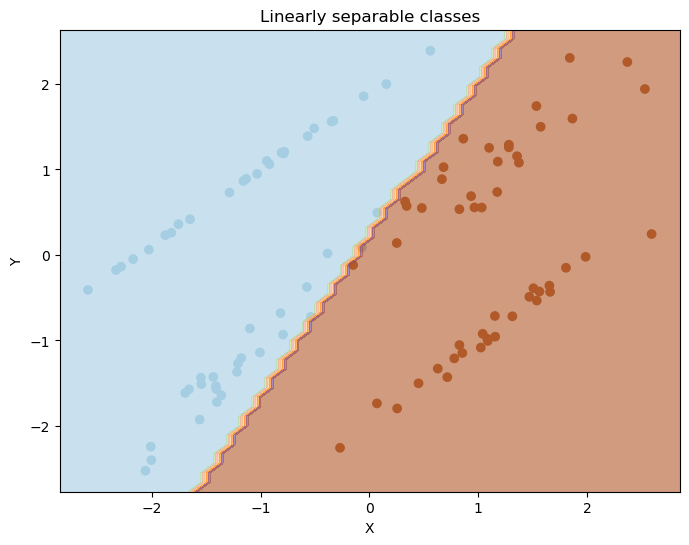

In [25]:
from sklearn.datasets import make_classification

# Generate a synthetic dataset for demonstration
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Create and train a perceptron model
clf = Perceptron()
clf.fit(X, y)

# Plot the decision boundary
clf.plot_linear_sep(X, y)

<Axes: >

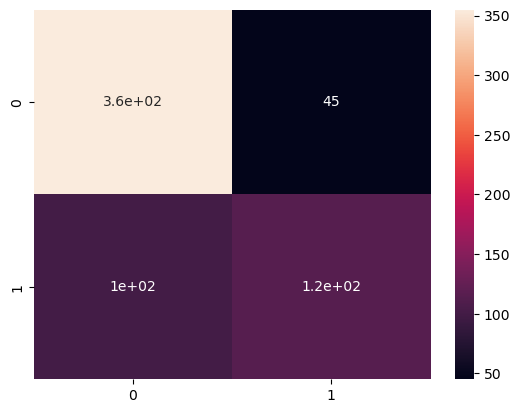

In [26]:
sns.heatmap(pd.DataFrame(cm), annot=True)